<a href="https://colab.research.google.com/github/Ankur099IIT/CNN-in-tensorflow--Course-2-Deeplearning.ai/blob/main/Transfer_learning_cats_and_dogs_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-05-03 08:36:47--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.202.128, 142.250.152.128, 173.194.193.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   172MB/s    in 0.5s    

2022-05-03 08:36:48 (172 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [3]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [4]:
pre_trained_model = InceptionV3(input_shape = (150,150,3),
                                include_top = False,
                                weights = None)

In [5]:
pre_trained_model.load_weights(local_weights_file)

In [6]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
pre_trained_model.summary()

In [8]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape', last_layer.output_shape)
last_output = last_layer.output

last layer output shape (None, 7, 7, 768)


In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model
import tensorflow as tf

x = tf.keras.layers.Flatten()(last_output)

x = tf.keras.layers.Dense(units = 1024, activation = 'relu')(x)

x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.summary()



In [14]:
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate = 0.001),
              metrics = ['accuracy'])

In [15]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2022-05-03 09:11:52--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.152.128, 173.194.194.128, 173.194.196.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.152.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   232MB/s    in 0.3s    

2022-05-03 09:11:52 (232 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [17]:
import zipfile

zip_ref = zipfile.ZipFile('/content/cats_and_dogs_filtered.zip', 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [18]:
import os

base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_dir = os.path.join(base_dir, 'validation')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')



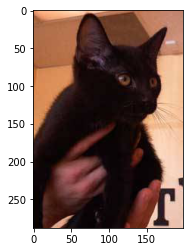

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
for images in os.listdir(train_cats_dir)[:5]:
  image = mpimg.imread(os.path.join(train_cats_dir, images))
  plt.imshow(image)

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   zoom_range = 0.2,
                                   shear_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (150,150),
                                                    batch_size = 20,
                                                    class_mode = 'binary')

validation_datagen = ImageDataGenerator(rescale = 1.0/255.0)

validation_generator = validation_datagen.flow_from_directory(directory = validation_dir,
                                                        target_size = (150,150),
                                                        batch_size = 20,
                                                        class_mode = 'binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
history = model.fit(train_generator, 
                    steps_per_epoch= 100,
                    epochs = 20,
                    validation_data = validation_generator,
                    validation_steps = 50)

Epoch 1/20
100/100 [==============================] - 39s 252ms/step - loss: 1.1538 - accuracy: 0.8460 - val_loss: 0.2902 - val_accuracy: 0.9230
Epoch 2/20
100/100 [==============================] - 23s 231ms/step - loss: 0.4390 - accuracy: 0.8890 - val_loss: 0.1454 - val_accuracy: 0.9550
Epoch 3/20
100/100 [==============================] - 24s 242ms/step - loss: 0.3319 - accuracy: 0.9035 - val_loss: 0.1240 - val_accuracy: 0.9630
Epoch 4/20
100/100 [==============================] - 23s 231ms/step - loss: 0.2775 - accuracy: 0.9145 - val_loss: 0.2545 - val_accuracy: 0.9410
Epoch 5/20
100/100 [==============================] - 24s 239ms/step - loss: 0.2746 - accuracy: 0.9170 - val_loss: 0.1642 - val_accuracy: 0.9520
Epoch 6/20
100/100 [==============================] - 24s 240ms/step - loss: 0.2572 - accuracy: 0.9190 - val_loss: 0.2016 - val_accuracy: 0.9450
Epoch 7/20
100/100 [==============================] - 26s 257ms/step - loss: 0.2419 - accuracy: 0.9270 - val_loss: 0.1354 - val_ac

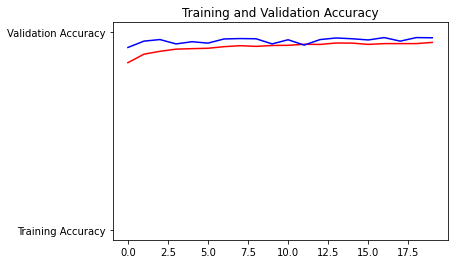

<Figure size 432x288 with 0 Axes>

In [35]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs  = range(len(acc))

plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and Validation Accuracy')

plt.figure()
plt.show()

